In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Importing dataset
column_names = ("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area_01","Wilderness_Area_02","Wilderness_Area_03","Wilderness_Area_04","Soil_Type_01","Soil_Type_02","Soil_Type_03","Soil_Type_04","Soil_Type_05","Soil_Type_06","Soil_Type_07","Soil_Type_08","Soil_Type_09","Soil_Type_10","Soil_Type_11","Soil_Type_12","Soil_Type_13","Soil_Type_14","Soil_Type_15","Soil_Type_16","Soil_Type_17","Soil_Type_18","Soil_Type_19","Soil_Type_20","Soil_Type_21","Soil_Type_22","Soil_Type_23","Soil_Type_24","Soil_Type_25","Soil_Type_26","Soil_Type_27","Soil_Type_28","Soil_Type_29","Soil_Type_30","Soil_Type_31","Soil_Type_32","Soil_Type_33","Soil_Type_34","Soil_Type_35","Soil_Type_36","Soil_Type_37","Soil_Type_38","Soil_Type_39","Soil_Type_40","Cover_Type")
dataset = pd.read_table("covtype.data", sep=",", names=column_names)
dataset_subset = dataset[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Cover_Type"]]
dataset_subset['Cover_Type'] = dataset_subset['Cover_Type'].astype('category')
dataset_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 11 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Cover_Type                            581012 non-null category
dtypes: category(1), int64(10)
memory usage: 44.9 MB


/Users/ellenitoumpas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
# FROM ONLINE YOUTUBE TUTORIAL

In [43]:
X = dataset.iloc[:,[0,1]].values
norm_data = MinMaxScaler()
X = norm_data.fit_transform(X)

In [44]:
nbr = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(X)
distances, indices = nbr.kneighbors(X)
distances = np.sort(distances, axis=0) #
# maybe instead of plotting 3 lines make an average of these before plotting?? 
distances = distances[:,1:4]

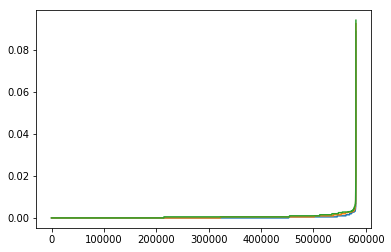

In [45]:
plt.plot(distances)

In [46]:
# COPYING FROM THE GRAPH e ~= 0.001
dbscan = cluster.DBSCAN(eps = 0.001, min_samples=10)
y = dbscan.fit_predict(X)
cluster_labels = np.unique(y)
cluster_labels
# This is not right. The number of clusters is way too large.

array([   -1,     0,     1, ..., 11122, 11123, 11124])

In [47]:
# EXPERIMENTING WITH BEST e value to get a cluster of 7
dbscan = cluster.DBSCAN(eps = 0.0075, min_samples=10)
y = dbscan.fit_predict(X)
cluster_labels = np.unique(y)
cluster_labels

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51])

# FROM CLASS TUTORIAL

[0.         0.         0.         ... 0.05035907 0.05272836 0.09538066]


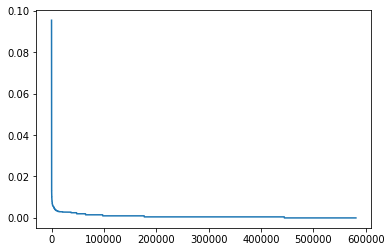

In [49]:
# with normalized data (Banu's method)
nbrs = NearestNeighbors().fit(X)
distances, indices = nbrs.kneighbors(X)
kDis = distances[:, 4]
kDis.sort()
print kDis
kDis = kDis[range(len(kDis)-1, 0, -1)]
plt.plot(range(0,len(kDis)), kDis)
plt.show()

In [50]:
# DBSCAN WITH e value from ABOVE

In [51]:
dbscan = cluster.DBSCAN(eps = 0.002, min_samples=3)
y = dbscan.fit_predict(X)
cluster_labels = np.unique(y)
cluster_labels
# TOO MANY CLUSTERS!

array([   -1,     0,     1, ..., 12317, 12318, 12319])

### EXPERIMENTING WITH MY OWN METHODOLOGY

In [99]:
##############################################################################
# INITIALIZING MODEL PARAMETERS
##############################################################################

# TESTING ELEVATION vs ASPECT
dataset_subset

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 0
variable_2 = 1


# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL OBJECT
model = dataset_subset.iloc[:,[variable_1,variable_2]] 

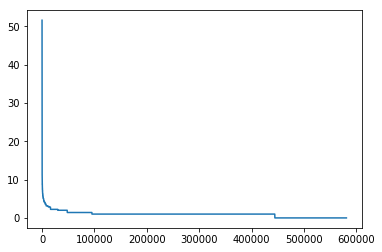

In [100]:
##############################################################################
# FIND THE BEST EPS TO USE FOR THIS RELATIONSHIP
##############################################################################

# SET UP THE NN TEST
nbrs = NearestNeighbors().fit(model)
distances, indices = nbrs.kneighbors(model)
distances.shape

# CHOOSE THE FOURTH NEIGHBOUR DISTANCE
kDis = distances[:, 4]
kDis.sort()

# NOTE FOR ME: Try and understand this line ?
kDis = kDis[range(len(kDis)-1, 0, -1)]

# PLOT THE K-DISTANCE GRAPH
plt.plot(range(0,len(kDis)), kDis)
plt.show()

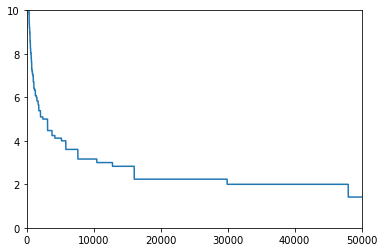

In [101]:
##############################################################################
# ZOOM IN TO SEE CURVE
##############################################################################
plt.plot(range(0,len(kDis)), kDis)
plt.xlim(0,50000)
plt.ylim(0,10)
plt.show()

In [ ]:
# FOR TESTING ONLY

# dbs = cluster.DBSCAN(eps=3, min_samples=10)
# dbs_fit = dbs.fit(model)
# labels = dbs_fit.labels_
# dataset_subset['clusters'] = labels
# dataset_subset['clusters'].value_counts()
#dataset_subset

/Users/ellenitoumpas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ellenitoumpas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


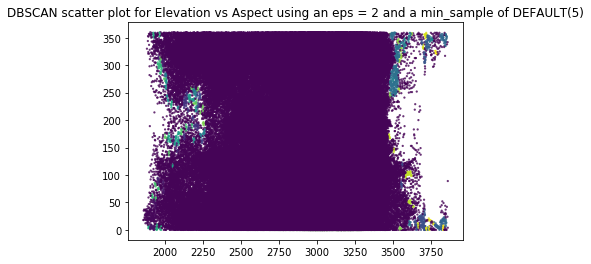

                        c
clusters target          
-1       1         2416.0
         2         1337.0
         3         8177.0
         4         1444.0
         5           49.0
         6         2861.0
         7         2228.0
 0       1       207682.0
         2       279430.0
         3        17881.0
         4          204.0
         5         9318.0
         6        10559.0
         7        16740.0
 1       1            NaN
         2            4.0
         3            3.0
         4            NaN
         5            1.0
         6            2.0
         7            NaN
 2       1            NaN
         2            9.0
         3           12.0
         4            NaN
         5            NaN
         6            2.0
         7            NaN
 3       1            NaN
         2           32.0
...                   ...
 1616    6            NaN
         7            NaN
 1617    1            NaN
         2            NaN
         3            3.0
         4  

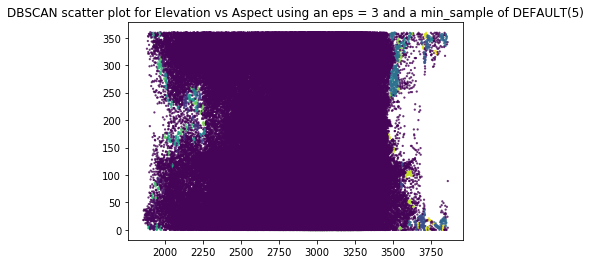

                        c
clusters target          
-1       1         1108.0
         2           53.0
         3         2757.0
         4          547.0
         5            NaN
         6          809.0
         7         1194.0
 0       1       209921.0
         2       283089.0
         3        30019.0
         4         1398.0
         5         9490.0
         6        15552.0
         7        18776.0
 1       1            NaN
         2            NaN
         3           42.0
         4            8.0
         5            NaN
         6            6.0
         7            NaN
 2       1            NaN
         2            NaN
         3           56.0
         4            5.0
         5            NaN
         6           21.0
         7            NaN
 3       1            NaN
         2            NaN
...                   ...
 554     6            2.0
         7            NaN
 555     1            NaN
         2            NaN
         3            4.0
         4  

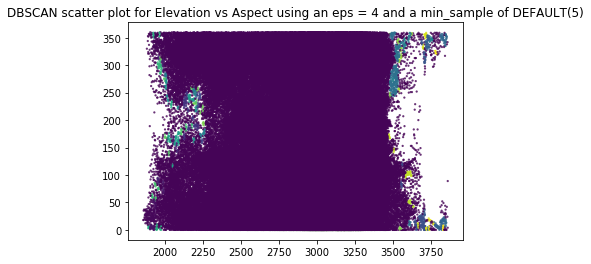

                        c
clusters target          
-1       1          581.0
         2            4.0
         3         1203.0
         4          178.0
         5            NaN
         6          316.0
         7          672.0
 0       1       210747.0
         2       283293.0
         3        33161.0
         4         2261.0
         5         9493.0
         6        16538.0
         7        19276.0
 1       1            NaN
         2            NaN
         3            4.0
         4            NaN
         5            NaN
         6            1.0
         7            NaN
 2       1            NaN
         2            NaN
         3           49.0
         4           14.0
         5            NaN
         6            1.0
         7            NaN
 3       1            NaN
         2            NaN
...                   ...
 331     6            NaN
         7            3.0
 332     1            1.0
         2            NaN
         3            NaN
         4  

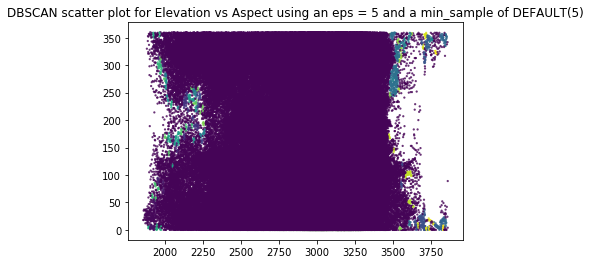

                        c
clusters target          
-1       1          339.0
         2            NaN
         3          434.0
         4           72.0
         5            NaN
         6          136.0
         7          313.0
 0       1       211228.0
         2       283301.0
         3        34827.0
         4         2605.0
         5         9493.0
         6        17011.0
         7        19596.0
 1       1            NaN
         2            NaN
         3           44.0
         4            NaN
         5            NaN
         6           95.0
         7            NaN
 2       1            NaN
         2            NaN
         3            NaN
         4            NaN
         5            NaN
         6            6.0
         7            NaN
 3       1            NaN
         2            NaN
...                   ...
 119     6            NaN
         7            7.0
 120     1            NaN
         2            NaN
         3            NaN
         4  

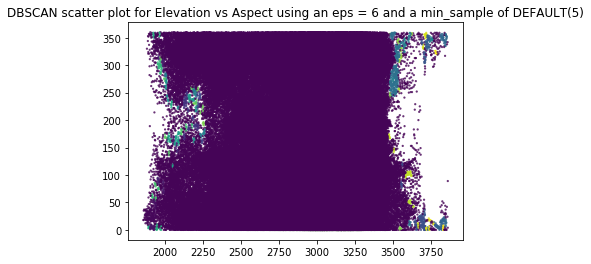

                        c
clusters target          
-1       1          247.0
         2            NaN
         3          242.0
         4           35.0
         5            NaN
         6           93.0
         7          194.0
 0       1       211512.0
         2       283301.0
         3        35302.0
         4         2671.0
         5         9493.0
         6        17245.0
         7        19809.0
 1       1            NaN
         2            NaN
         3            NaN
         4            NaN
         5            NaN
         6            7.0
         7            NaN
 2       1            NaN
         2            NaN
         3            4.0
         4            NaN
         5            NaN
         6            1.0
         7            NaN
 3       1            NaN
         2            NaN
...                   ...
 54      6            NaN
         7            9.0
 55      1            NaN
         2            NaN
         3            NaN
         4  

In [144]:
##############################################################################
# EXPERIMENT WITH AN EPS BETWEEN 2 - 6 (NO OTHER ARGUMENTS CHANGED)
##############################################################################

########################
## INITIALIZE VARIBALES
########################

# INITIAL BEST PARAMETERS TABLES
param_columnnames = ['variable_1','variable_2','eps_value','min_samples_value','metric','metric_params','algorithm','leaf_size_value','p_value','num_of_clusters','homogenity_rating']
best_parameters = pd.DataFrame(columns=param_columnnames) 

## Arguments currently just default
#eps = [2,3,4,5,6]
#min_samples = [0.1,0.5,1,5,10,50,100,500,1000,5000,10000,50000,100000]
ms = 'default'
metric = 'default'
metric_params = 'default'
algorithm = 'default'
leaf_size_value = 'default'
p_value = 'default'

i = 2 ## SET THE BOTTOM RANGE
t = 7 ## SET TOP RANGE + 1

dataset_subset.rename(columns={'Cover_Type': 'target'}, inplace=True)

for i in range(i, t):
    
    # Run the model
    dbs = cluster.DBSCAN(eps=i)
    dbs_fit = dbs.fit(model)
    labels = dbs_fit.labels_
    dataset_subset['clusters'] = labels
    dataset_subset['c'] = "count"

    # Now visulise the scatter of the clusters
    title = "DBSCAN scatter plot for "+str(model.columns[variable_1])+" vs "+str(model.columns[variable_2])+" using an eps = "+ str(i)+" and a min_sample of DEFAULT(5)"
    plt.scatter(model.iloc[:,variable_1],model.iloc[:,variable_2], c=labels_1, alpha = 0.8, s= 5.0, lw= 0)
    plt.title(title)
    # plt.legend(labels_1.unique())
    plt.show() 
    
    # Do other checks on the clusters
    clustering_result = dataset_subset[["clusters", "target", "c"]].groupby(["clusters", "target"]).agg("count") 
    print(clustering_result)
    
    
    homogeneity_rating = metrics.homogeneity_completeness_v_measure(dataset_subset["target"], dataset_subset["clusters"])

    
    # Estimated number of clusters: 3
    # Homogeneity: 0.953
    # Completeness: 0.883
    # V-measure: 0.917
    # Adjusted Rand Index: 0.952
    # Adjusted Mutual Information: 0.883
    # Silhouette Coefficient: 0.626
    
    # Add a row to best parameters table
    best_parameters = best_parameters.append({'variable_1': model.columns[variable_1],
                                          'variable_2': model.columns[variable_2],
                                          'eps_value':i,
                                          'min_samples_value':ms,
                                          'metric':metric,
                                          'metric_params':metric_params,
                                          'algorithm':algorithm,
                                          'leaf_size_value':leaf_size_value,
                                          'p_value':p_value,
                                          'num_of_clusters': dataset_subset[["clusters"]].agg("count").values,
                                           'homogenity_rating': homogeneity_rating},ignore_index=True)
    
    i = i + 1


print("A comparision of the best arguments to use for DBSCAN for these variables: \n",best_parameters)

In [ ]:
# ONCE PLOTTED DO CHECKS...